,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


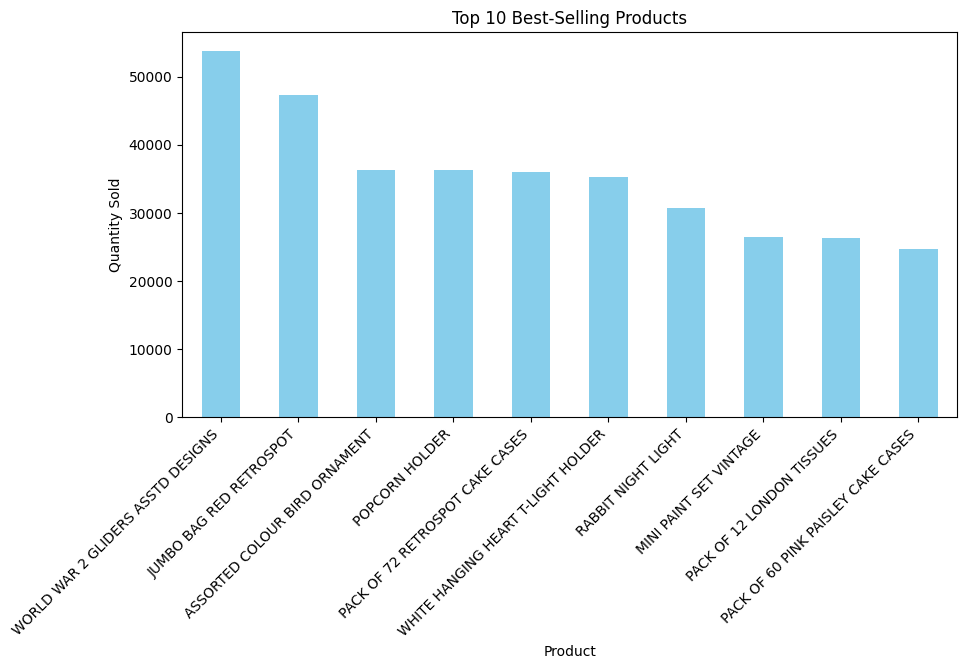


Top 5 Recommended Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    53847
JUMBO BAG RED RETROSPOT              47363
ASSORTED COLOUR BIRD ORNAMENT        36381
POPCORN HOLDER                       36334
PACK OF 72 RETROSPOT CAKE CASES      36039
Name: Quantity, dtype: int64


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\bhara\Downloads\OnlineRetail (1).xlsx"
df = pd.read_excel(file_path)

# Display basic info
display(df.head())  # Show first 5 rows
#print("\nDataset Info:\")
df.info()

# Check for missing values
#print("\nMissing Values:\")
print(df.isnull().sum())

# Drop rows with missing Customer IDs
df = df.dropna(subset=["InvoiceNo"])

# Convert Invoice Date to datetime format
df["Invoice_Date"] = pd.to_datetime(df["InvoiceDate"])

# Add a Total Price column
df["Total_Price"] = df["Quantity"] * df["UnitPrice"]

# Display top-selling products
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha='right')
plt.show()

# Generate a basic popularity-based recommendation system
def recommend_top_products(n=5):
    top_n_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(n)
    return top_n_products

# Show top 5 recommended products
print("\nTop 5 Recommended Products:")
print(recommend_top_products(5))
